# Problem-1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Read and display the original image in color

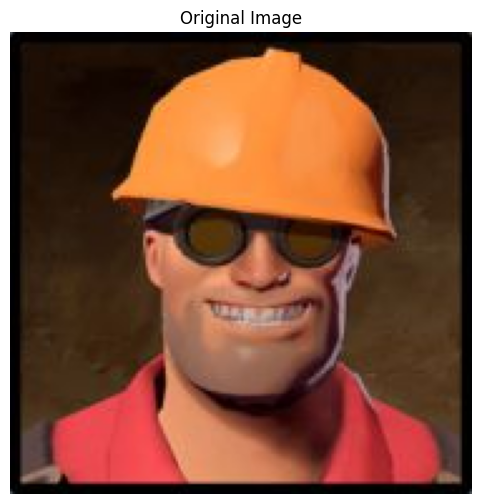

In [3]:
image = cv2.imread('tf2_engineer.jpg')         
if image is None:
    raise FileNotFoundError("Image file not found.")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

Find the center and print the intensity value at the center

In [4]:
height, width, _ = image.shape
yc, xc = height // 2, width // 2
intensity_center = image[yc, xc]

print(f"Center coordinates: (y={yc}, x={xc})")
print(f"Intensity at center (BGR): {intensity_center}")

Center coordinates: (y=92, x=92)
Intensity at center (BGR): [ 67  92 172]


Place a rectangular colour patch around the centre of the image. Height of the patch is 30 pixels;
width of the patch is 40 pixels. Patch Colour (in Hex): #329ea8

In [5]:
patch_height = 30
patch_width = 40

top_left = (xc - patch_width // 2, yc - patch_height // 2)
bottom_right = (xc + patch_width // 2, yc + patch_height // 2)

Print the intensity value at the centre of the colour patch. 


In [9]:
hex_color = '#329ea8'
hex_color = hex_color.lstrip('#')
rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
bgr_color = tuple(reversed(rgb_color))

cv2.rectangle(image, top_left, bottom_right, bgr_color, thickness=-1)
intensity_patch_center = image[yc, xc]
print(f"Intensity at patch center (BGR): {intensity_patch_center}")

Intensity at patch center (BGR): [168 158  50]


Display the new image with the color patch

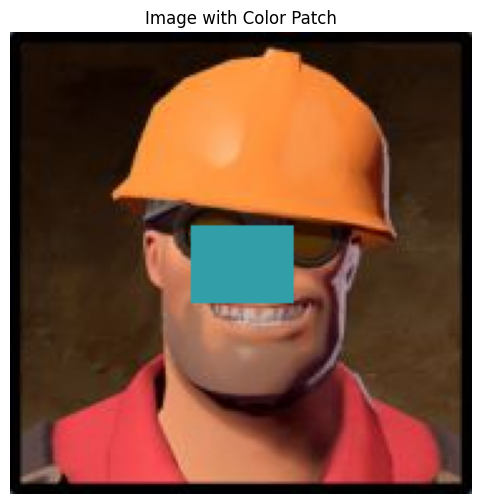

In [8]:
image_with_patch_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image_with_patch_rgb)
plt.title('Image with Color Patch')
plt.axis('off')
plt.show()

# Problem-2

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

Read and display the original image in grayscale

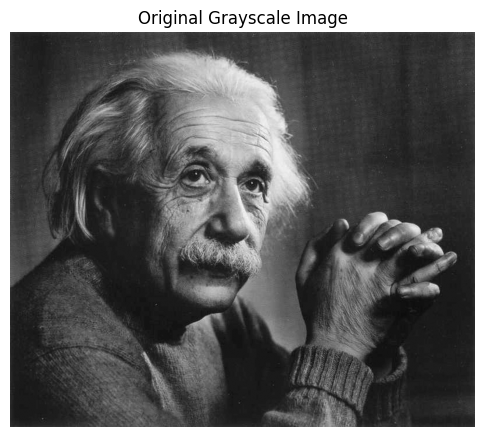

In [ ]:
img = Image.open("einstein.tif").convert("L")

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()



Find the negative of the input image

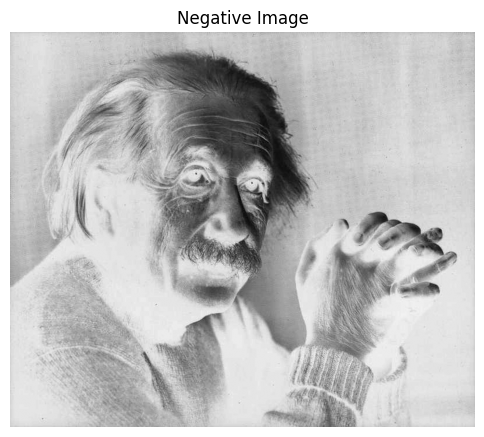

In [20]:
img_array = np.array(img)
neg_array = 255 - img_array

plt.figure(figsize=(6, 6))
plt.imshow(neg_array, cmap='gray')
plt.title("Negative Image")
plt.axis("off")
plt.show()


Get 5 random pixel intensity values from original and negative images

In [17]:
height, width = img_array.shape
random_pixels = [(random.randint(0, height - 1), random.randint(0, width - 1)) for _ in range(5)]

print("Pixel intensity values before and after (original vs negative):")
for y, x in random_pixels:
    orig_val = img_array[y, x]
    neg_val = neg_array[y, x]
    print(f"Pixel ({y}, {x}) - Original: {orig_val}, Negative: {neg_val}")

Pixel intensity values before and after (original vs negative):
Pixel (505, 711) - Original: 96, Negative: 159
Pixel (587, 510) - Original: 113, Negative: 142
Pixel (538, 551) - Original: 126, Negative: 129
Pixel (37, 543) - Original: 103, Negative: 152
Pixel (402, 441) - Original: 124, Negative: 131


# Problem-3

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Read and display the original image in grayscale

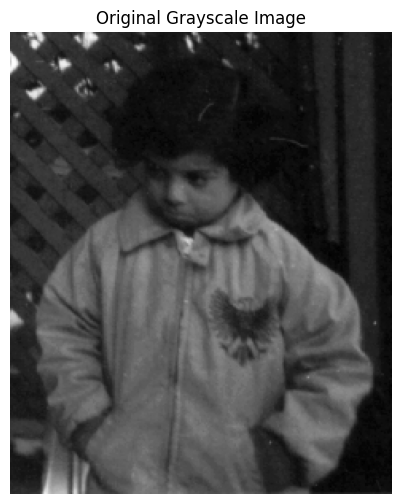

In [2]:
img = Image.open('pout.tif').convert('L')
img_array = np.array(img)

plt.figure(figsize=(6, 6))
plt.imshow(img_array, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

Apply log transform and display the result

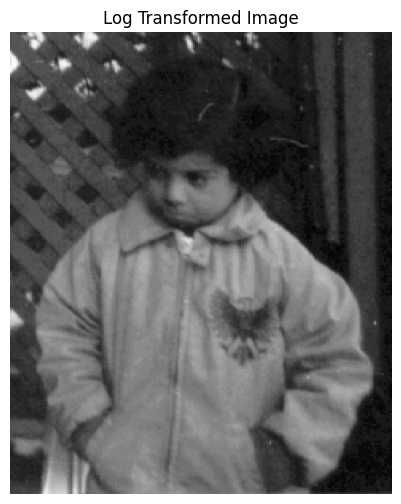

In [3]:
img_float = img_array.astype(np.float32)
log_transformed = np.log1p(img_float)  # log(1 + r)
log_transformed = log_transformed / log_transformed.max() * 255  # Normalize to 0-255
log_image = log_transformed.astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(log_image, cmap='gray')
plt.title("Log Transformed Image")
plt.axis('off')
plt.show()

Apply inverse log transform to original image and display result

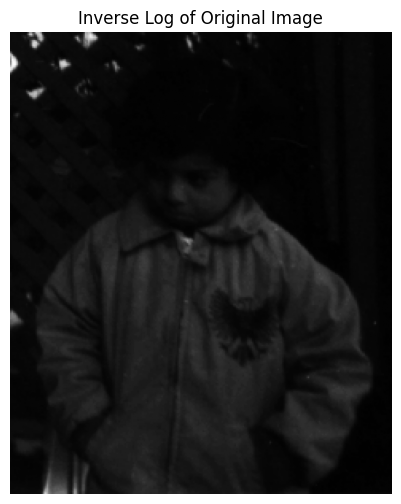

In [11]:
safe_img_float = img_float / 50

inverse_log_original = np.expm1(safe_img_float)
inverse_log_original = inverse_log_original / inverse_log_original.max() * 255
inverse_log_original = np.nan_to_num(inverse_log_original).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(inverse_log_original, cmap='gray')
plt.title("Inverse Log of Original Image")
plt.axis('off')
plt.show()


Apply inverse log transform to image you get from step 2 and display the result.


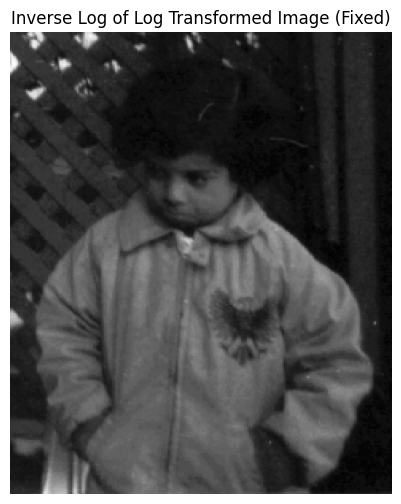

In [13]:
log_image_float = log_image.astype(np.float32)

log_max = np.log1p(255)
log_image_rescaled = log_image_float / 255 * log_max

inverse_log_step2 = np.expm1(log_image_rescaled)


inverse_log_step2 = inverse_log_step2 / inverse_log_step2.max() * 255
inverse_log_step2 = np.nan_to_num(inverse_log_step2).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(inverse_log_step2, cmap='gray')
plt.title("Inverse Log of Log Transformed Image (Fixed)")
plt.axis('off')
plt.show()


Comment:
log transform made the darkest sections of the picture brighter and easier to notice, which helped bring them out, But in Step 4, I've tried to undo the change with the inverted log. The outcome looked the same as the original image, which is implies that the log conversion can be undone quite well if you do it well ,There might be some small differences because of scaling, but overall it worked.



# Problem-4

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read and display the original image in grayscale

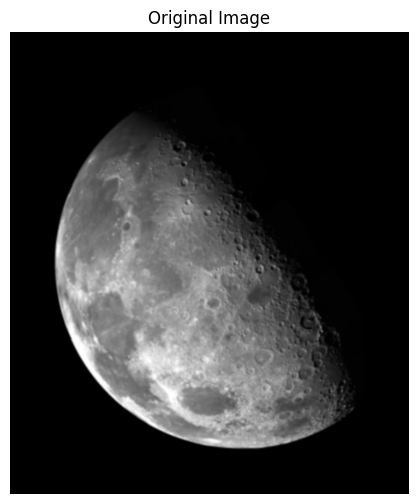

In [25]:
img = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

Defining the masking filters

In [ ]:
def unsharp_mask_spatial(image, k):
    blurred = cv2.GaussianBlur(image, (5, 5), 1)
    mask = cv2.subtract(image, blurred)
    sharpened = cv2.addWeighted(image, 1.0, mask, k, 0)
    return sharpened

k_values = [0.2, 0.5, 1.0]
spatial_results = [unsharp_mask_spatial(img, k) for k in k_values]

def high_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 - np.exp(-(D**2) / (2 * (D0**2)))
    return H

def unsharp_mask_frequency(image, k, D0=40):
    img_float = np.float32(image)
    dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    H = high_pass_filter(image.shape, D0)
    H = H[:, :, np.newaxis]
    H = np.repeat(H, 2, axis=2)

    unsharp_filter = 1 + k * H
    filtered = dft_shift * unsharp_filter

    f_ishift = np.fft.ifftshift(filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(img_back)


Display the result from the step 2 side by side with the result from the step 3 

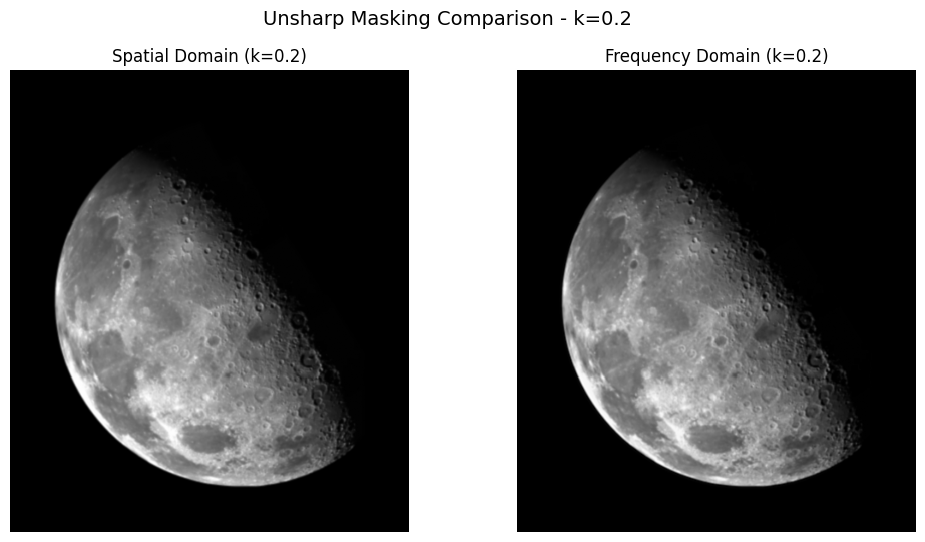

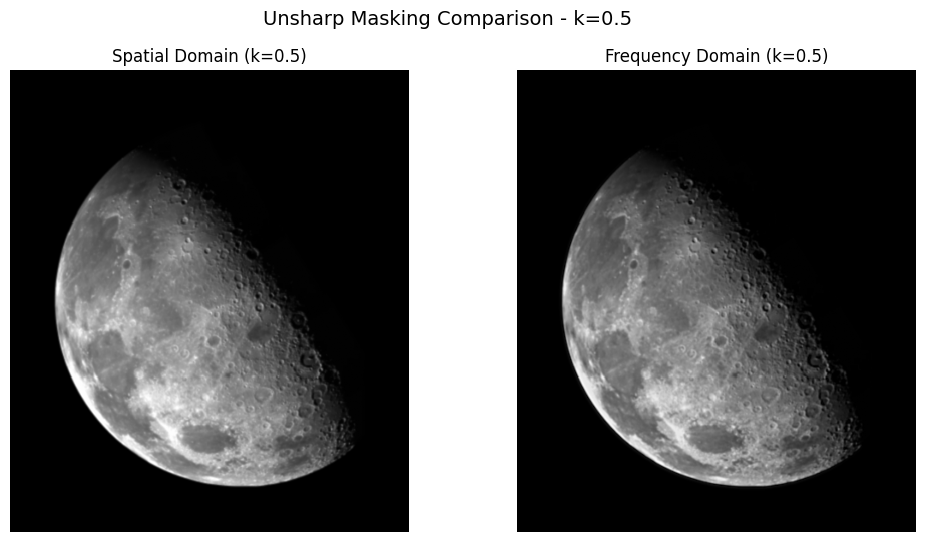

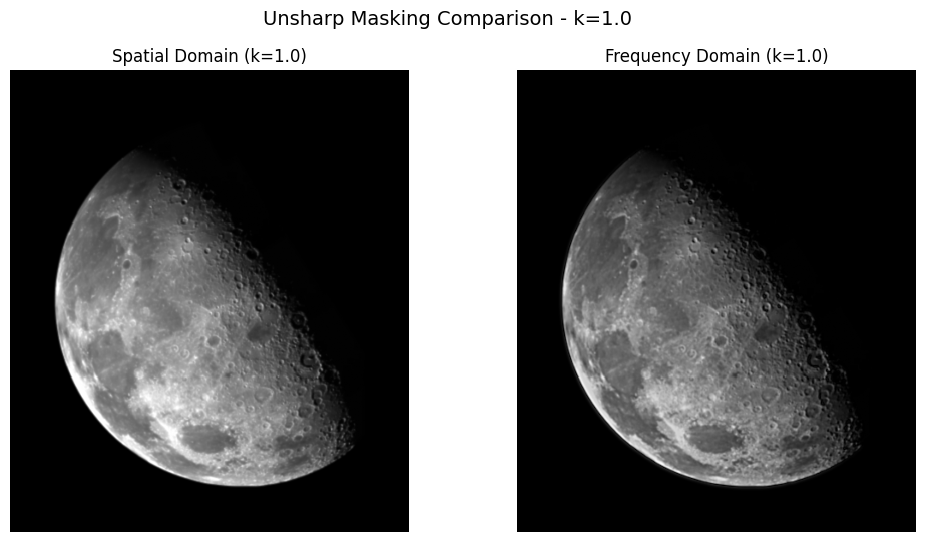

In [28]:
frequency_results = [unsharp_mask_frequency(img, k, D0=40) for k in k_values]

for i, k in enumerate(k_values):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(spatial_results[i], cmap='gray')
    axs[0].set_title(f"Spatial Domain (k={k})")
    axs[0].axis('off')

    axs[1].imshow(frequency_results[i], cmap='gray')
    axs[1].set_title(f"Frequency Domain (k={k})")
    axs[1].axis('off')

    plt.suptitle(f"Unsharp Masking Comparison - k={k}", fontsize=14)
    plt.show()


# Problem-5

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read and display the original image in grayscale.


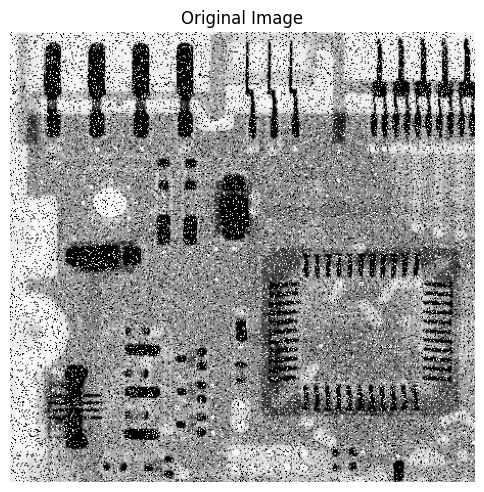

In [33]:
img = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

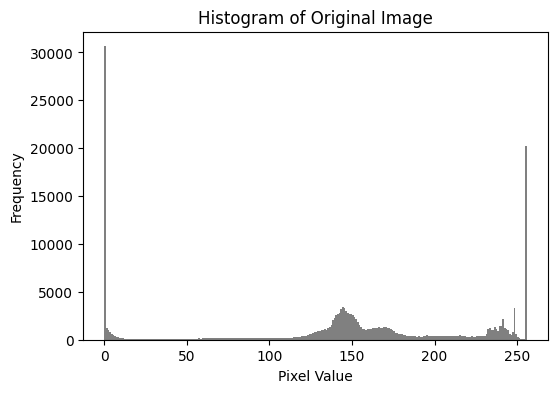

In [34]:
plt.figure(figsize=(6, 4))
plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

Identify and describe the type of noise (e.g., salt-and-pepper, Gaussian) using visual inspection
and/or statistical tools (e.g., histogram). 

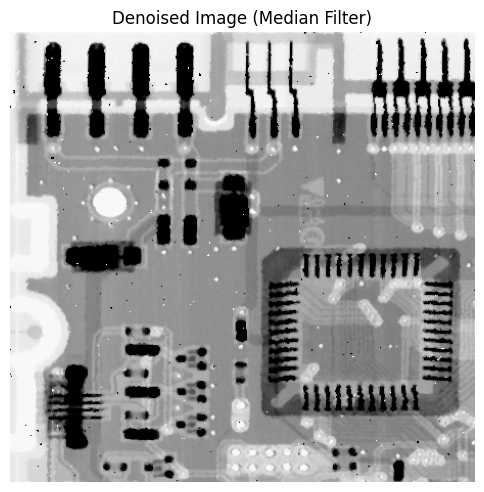

In [35]:
denoised_median = cv2.medianBlur(img, 3)

plt.figure(figsize=(6, 6))
plt.imshow(denoised_median, cmap='gray')
plt.title("Denoised Image (Median Filter)")
plt.axis('off')
plt.show()

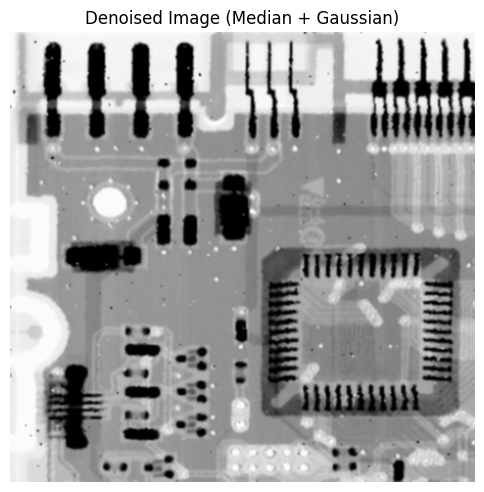

In [36]:
denoised_combined = cv2.GaussianBlur(denoised_median, (3, 3), 0)

plt.figure(figsize=(6, 6))
plt.imshow(denoised_combined, cmap='gray')
plt.title("Denoised Image (Median + Gaussian)")
plt.axis('off')
plt.show()

# Problem-6

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Read and display the original image in grayscale.


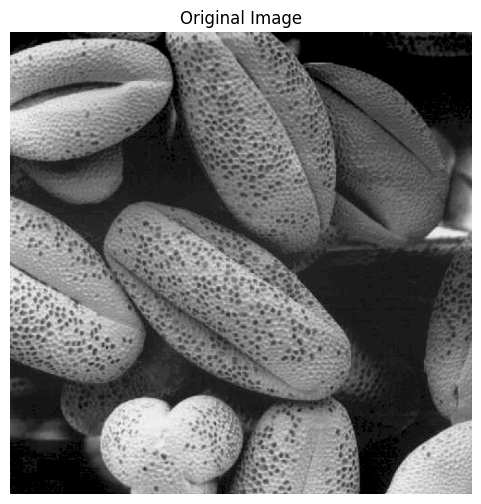

In [43]:
img = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

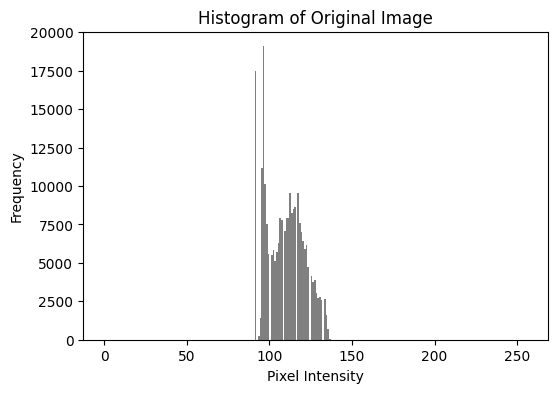

Min pixel value: 91
Max pixel value: 138
Mean pixel value: 109.079976
Std deviation: 11.489510861626094


In [38]:
plt.figure(figsize=(6, 4))
plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

print("Min pixel value:", np.min(img))
print("Max pixel value:", np.max(img))
print("Mean pixel value:", np.mean(img))
print("Std deviation:", np.std(img))

Histogram After Equalization

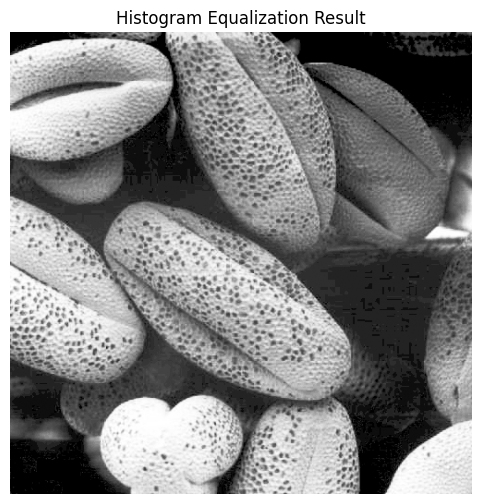

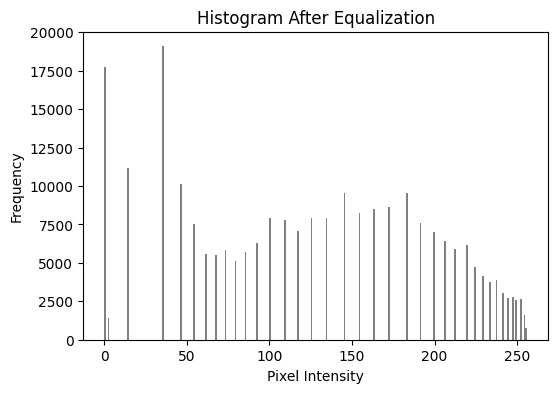

In [39]:
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(6, 6))
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalization Result")
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(equalized.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

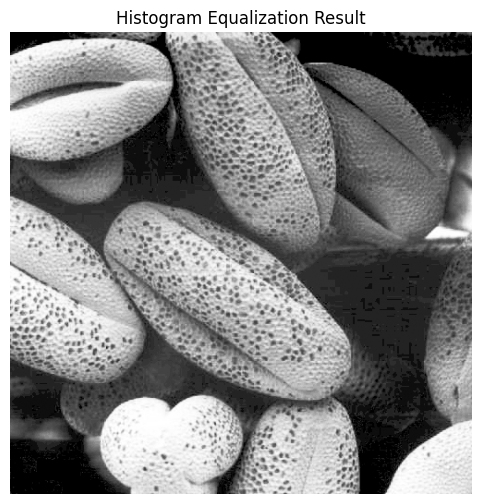

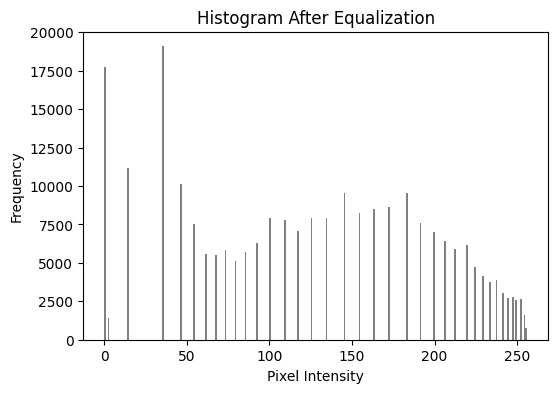

In [40]:
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(6, 6))
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalization Result")
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(equalized.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()